In [37]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt


In [38]:
# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

In [39]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [42]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [43]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
2/2 [==============================] - 0s 145ms/step - loss: 1.2317 - accuracy: 0.4779 - val_loss: 1.1344 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 0s 27ms/step - loss: 1.1328 - accuracy: 0.5133 - val_loss: 1.0472 - val_accuracy: 0.5862
Epoch 3/50
2/2 [==============================] - 0s 30ms/step - loss: 1.0433 - accuracy: 0.5664 - val_loss: 0.9645 - val_accuracy: 0.5862
Epoch 4/50
2/2 [==============================] - 0s 28ms/step - loss: 0.9591 - accuracy: 0.6106 - val_loss: 0.8879 - val_accuracy: 0.6207
Epoch 5/50
2/2 [==============================] - 0s 29ms/step - loss: 0.8829 - accuracy: 0.6814 - val_loss: 0.8187 - val_accuracy: 0.7586
Epoch 6/50
2/2 [==============================] - 0s 29ms/step - loss: 0.8147 - accuracy: 0.7168 - val_loss: 0.7560 - val_accuracy: 0.8276
Epoch 7/50
2/2 [==============================] - 0s 30ms/step - loss: 0.7520 - accuracy: 0.8142 - val_loss: 0.6986 - val_accuracy: 0.9310
Epoch 8/50
2/2 [==========

In [44]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.0426 - accuracy: 1.0000


In [45]:
# Print the test accuracy
print('Test accuracy:', test_acc)

Test accuracy: 1.0


In [46]:
# Plot the accuracy vs. iterations and loss vs. iterations
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

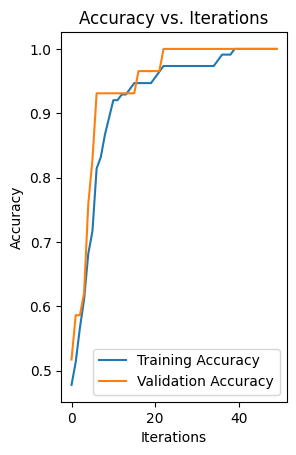

In [47]:
# Plot the accuracy vs. iterations
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

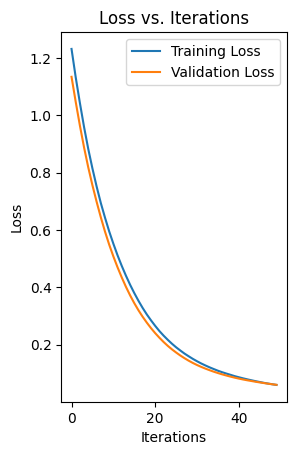

In [48]:
# Plot the loss vs. iterations
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.show()